<a href="https://colab.research.google.com/github/shawjaan/PyTorchLearning/blob/main/00_pytorch_Justin's_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
print(torch.__version__)

1.13.1+cu116


## Introduction to Tensors

### Creating tensors

PyTorch tensors are created using `torch.Tensor()` = https://pytorch.org/docs/stable/tensors.html



In [ ]:
# scalar
scalar = torch.tensor(7)
scalar

tensor(7)

In [ ]:
# Get tensor back as Python int (only works with one-element tensors)
scalar.item()

7

In [ ]:
# A scalar has no dimenstions
scalar.ndim


0

In [ ]:
# A Vector has 1 dimenstions (one square bracket)
vector = torch.tensor([7,7])
print(vector)
print(vector.shape)
print(f"dimensions: {vector.ndim}")

tensor([7, 7])
torch.Size([2])
dimensions: 1


In [ ]:
# A MATRIX has 2 dimentions (two square brackets)
MATRIX = torch.tensor([[7,8],[9,10]])
print(MATRIX)
print(MATRIX.shape)
print(f"dimensions: {MATRIX.ndim}")

tensor([[ 7,  8],
        [ 9, 10]])
torch.Size([2, 2])
dimensions: 2


In [ ]:
# A TENSOR has 3 dimentions (three square brackets)
TENSOR = torch.tensor([[[1,2,3],[4,5,6],[7,8,9]]])
print(TENSOR)
print(TENSOR.shape)
print(f"dimensions: {TENSOR.ndim}")

tensor([[[1, 2, 3],
         [4, 5, 6],
         [7, 8, 9]]])
torch.Size([1, 3, 3])
dimensions: 3


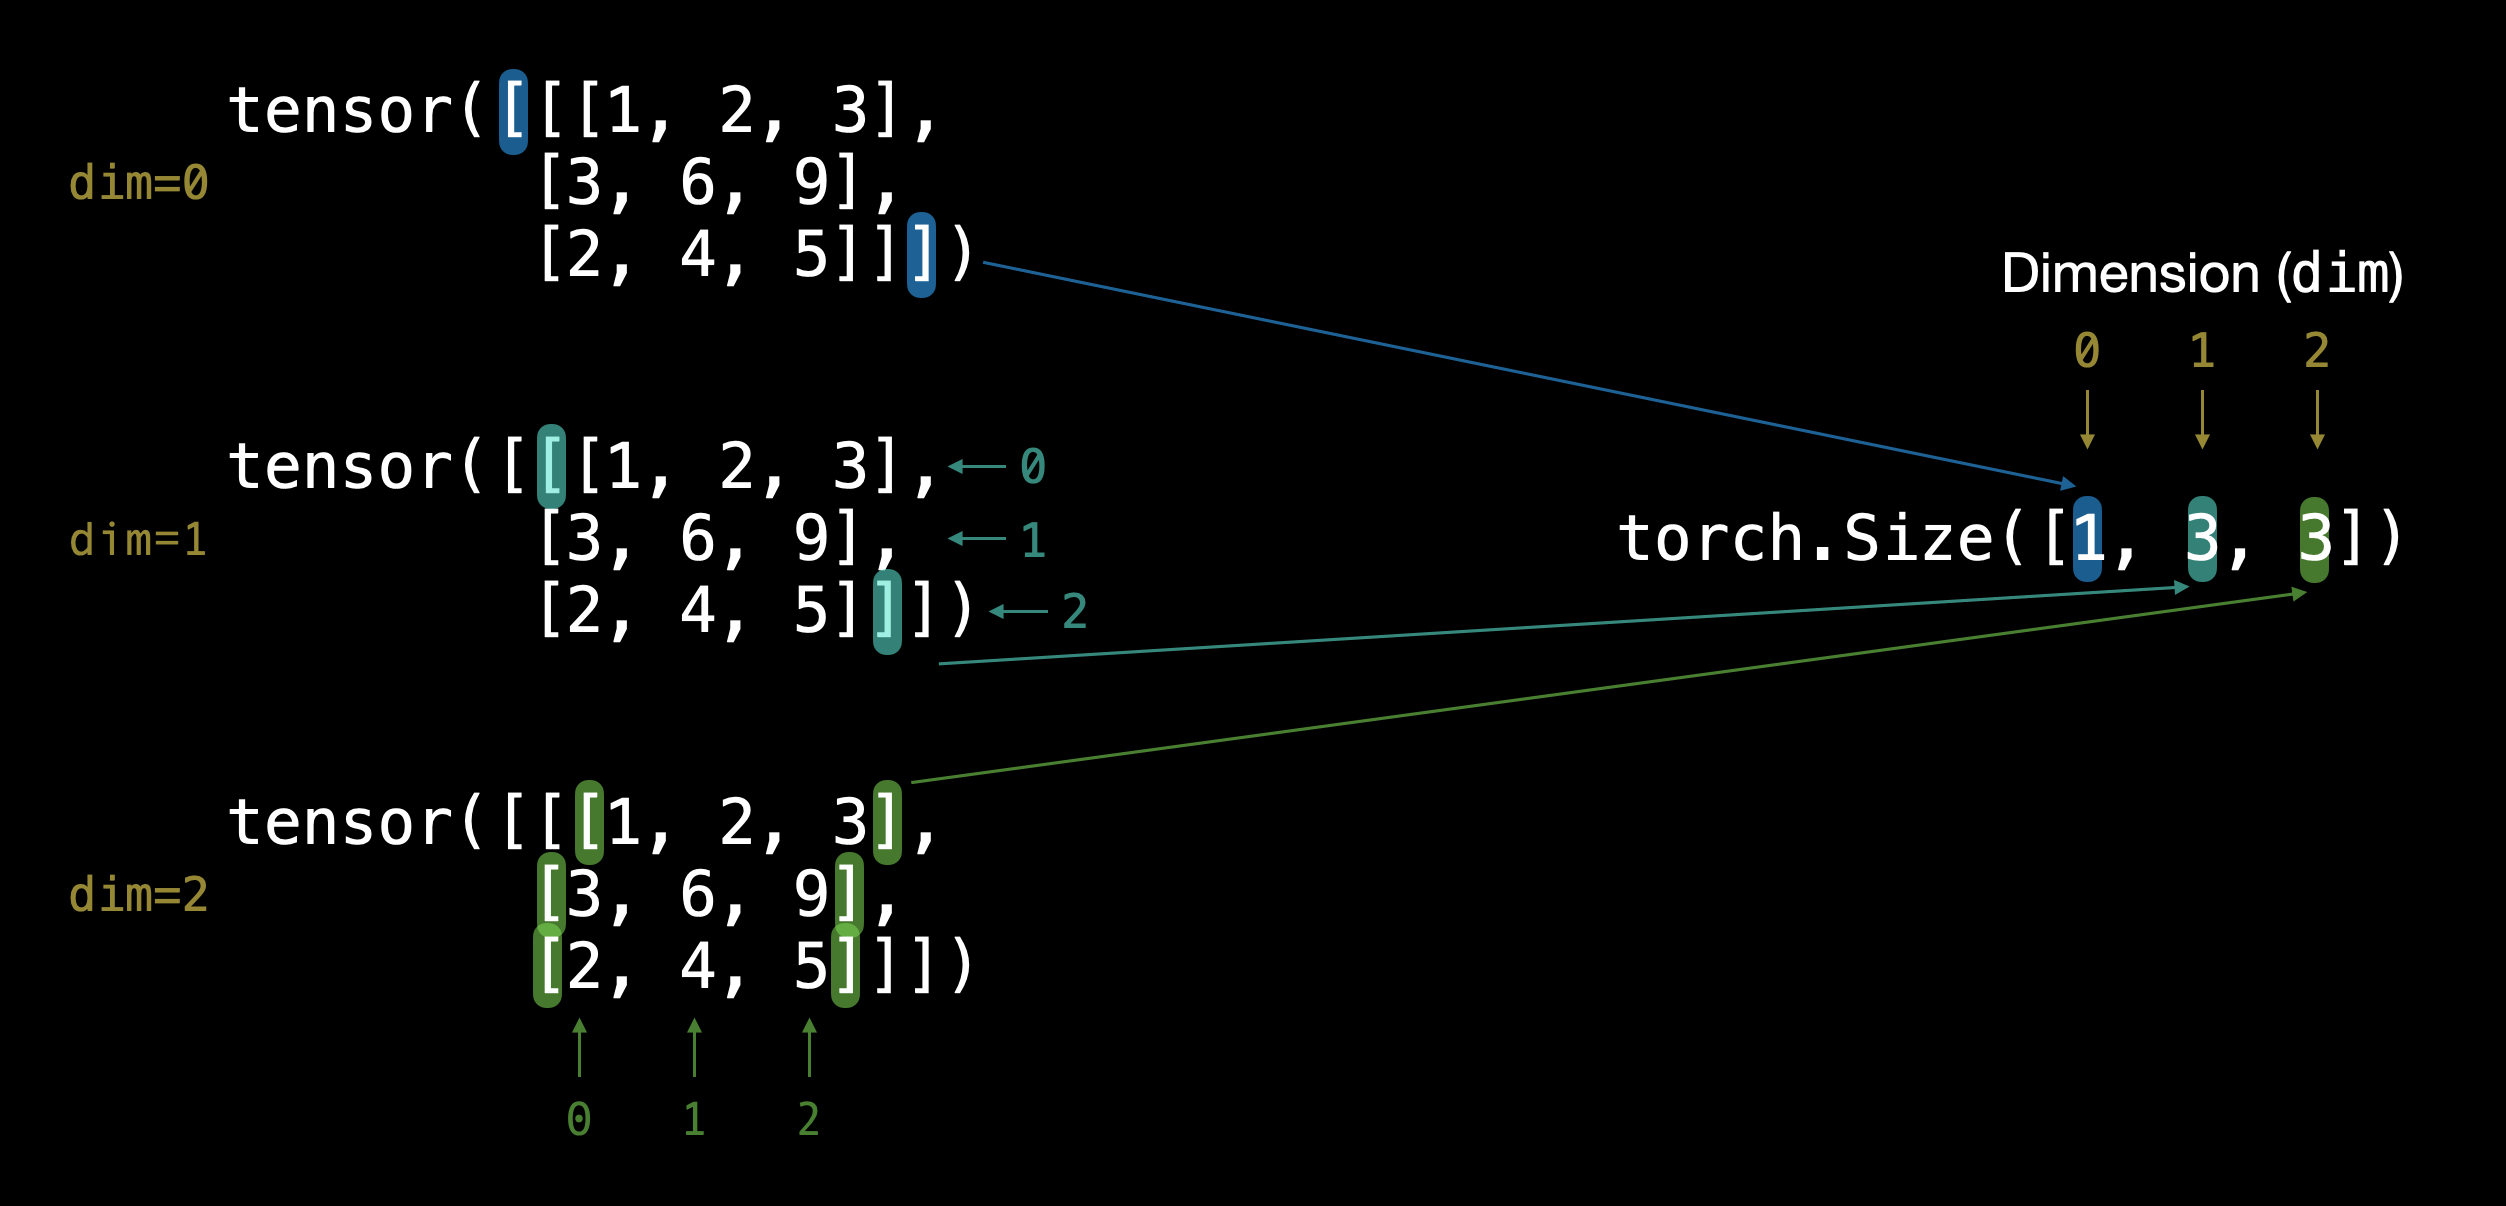

Let's summarise.

| Name | What is it? | Number of dimensions | Lower or upper (usually/example) |
| ----- | ----- | ----- | ----- |
| **scalar** | a single number | 0 | Lower (`a`) | 
| **vector** | a number with direction (e.g. wind speed with direction) but can also have many other numbers | 1 | Lower (`y`) |
| **matrix** | a 2-dimensional array of numbers | 2 | Upper (`Q`) |
| **tensor** | an n-dimensional array of numbers | can be any number, a 0-dimension tensor is a scalar, a 1-dimension tensor is a vector | Upper (`X`) | 

![scalar vector matrix tensor and what they look like](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-scalar-vector-matrix-tensor.png)


### Random tensors

Why random tensors?

Random tensors are important because the way neural networks learn is that they start with tensors full of random numbers and then adjust those random numbers to better represent the data

`Start with random numbers` -> `look at data` -> `update random numbers` -> `look at data` -> `update random numbers`

Torch random tensors = https://pytorch.org/docs/stable/generated/torch.rand.html#torch.rand

In [ ]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(3, 4)
random_tensor

tensor([[0.8417, 0.3337, 0.0120, 0.5175],
        [0.4881, 0.0510, 0.4058, 0.9260],
        [0.3125, 0.8651, 0.3954, 0.3675]])

In [ ]:
# Create a random tensor with similar shape to an image
random_image_size_tensor = torch.rand(224, 224, 3) #height, width, colour channels
print(random_image_size_tensor)
print(f"dimensions: {random_image_size_tensor.ndim}")

tensor([[[0.6266, 0.3433, 0.5921],
         [0.2092, 0.0311, 0.2560],
         [0.1991, 0.1031, 0.2266],
         ...,
         [0.4130, 0.4342, 0.0015],
         [0.5702, 0.2622, 0.6130],
         [0.1179, 0.8648, 0.7136]],

        [[0.3275, 0.7590, 0.8259],
         [0.7244, 0.1763, 0.5341],
         [0.0631, 0.9089, 0.6151],
         ...,
         [0.1363, 0.0236, 0.3054],
         [0.9065, 0.9371, 0.5317],
         [0.8565, 0.0390, 0.8486]],

        [[0.4393, 0.3208, 0.0520],
         [0.6794, 0.5132, 0.4004],
         [0.6205, 0.4820, 0.7947],
         ...,
         [0.0453, 0.3181, 0.5607],
         [0.0026, 0.5558, 0.2295],
         [0.3112, 0.2007, 0.1414]],

        ...,

        [[0.4380, 0.9158, 0.1676],
         [0.8262, 0.3177, 0.1921],
         [0.6740, 0.8942, 0.2965],
         ...,
         [0.6231, 0.9602, 0.8123],
         [0.7031, 0.1135, 0.3802],
         [0.4016, 0.4602, 0.6826]],

        [[0.5182, 0.2656, 0.8264],
         [0.3238, 0.2506, 0.6618],
         [0.

![example of going from an input image to a tensor representation of the image, image gets broken down into 3 colour channels as well as numbers to represent the height and width](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/00-tensor-shape-example-of-image.png)


### Zeros and ones


In [ ]:
# Create a tensor of all zeros (Used for masking out)
zeros = torch.zeros(3,4)
zeros

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
zeros * random_tensor

tensor([[0., 0., 0., 0.],
        [0., 0., 0., 0.],
        [0., 0., 0., 0.]])

In [ ]:
# Create a tensor of all ones
ones = torch.ones(3,4)
ones

tensor([[1., 1., 1., 1.],
        [1., 1., 1., 1.],
        [1., 1., 1., 1.]])

### Creating a range of tensors and tensors-like

In [ ]:
# Use torch.range()
one_to_ten = torch.arange(start = 1, end = 11, step = 1)
one_to_ten

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [ ]:
# Creating tensors like
ten_zeros = torch.zeros_like(input=(one_to_ten))
ten_zeros

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

### Tensor datatypes

**Note:** Tensor datatypes is one of the 3 big erroes you'll run into with PyTorch & and deep learning

  1. Tensors not right data type
  2. Tensors not right shapte
  3. Tensors not on the right device



More information about datatypes can be found on this [link](https://pytorch.org/docs/stable/tensors.html) on the top page

Why [Precision in computing](https://en.wikipedia.org/wiki/Precision_(computer_science) is important


In [ ]:
# Float 32 tensor (dtype = torch.float or torch.float32)

In [ ]:
float_32_tensor = torch.tensor([3.0, 6.0, 9.0], dtype = None, # defaults to None, which is torch.float32 or whatever datatype is passed
                                                device = None, # defaults to None, which uses the default tensor type
                                                requires_grad = False) # if True, operations perfromed on the tensor are recorded 
print(float_32_tensor)
print(float_32_tensor.shape, float_32_tensor.dtype, float_32_tensor.device)

tensor([3., 6., 9.])
torch.Size([3]) torch.float32 cpu


In [ ]:
float_16_tensor = float_32_tensor.type(torch.float16)
float_16_tensor

tensor([3., 6., 9.], dtype=torch.float16)

### Getting information from tensors (tensor attributes)

  1. Tensors not right data type  -> to do get datatype from a tensor, can use `tensor.dtype`
  2. Tensors not right shape  -> to get shape from a tensor, can use `tensor.shape`
  3. Tensors not on the right device  -> to get decive from a tensor, can use `tensor.device`

In [ ]:
# Create a tensor
some_tensor = torch.rand(3,4)
some_tensor

tensor([[0.5766, 0.5758, 0.6154, 0.1471],
        [0.5081, 0.7013, 0.7082, 0.3654],
        [0.5894, 0.6022, 0.0866, 0.9332]])

In [ ]:
# Find out details about some tensor
print(f'Datatype of tensor: {some_tensor.dtype}')
print(f'Shape of tensor: {some_tensor.shape}')
print(f'Device of tensor: {some_tensor.device}')


Datatype of tensor: torch.float32
Shape of tensor: torch.Size([3, 4])
Device of tensor: cpu


In [ ]:
# Changing dtype of a tensor
print(some_tensor.dtype)
changed_tensor = some_tensor.type(torch.long)
print(changed_tensor.dtype)


torch.float32
torch.int64


### Manipulating Tensors (tensor operations)

Tensor operations include:
* Addition
* Subtraction
* Multipliction (element-wise)
* Division
* Matrix multipliction

In [ ]:
# Add a tensor by 10
tensor = torch.tensor([1,2,3])
tensor + 10

tensor([11, 12, 13])

In [ ]:
# Multiply a tensor by 10
tensor * 10

tensor([10, 20, 30])

In [ ]:
# Subtract a tensor by 10
tensor - 10

tensor([-9, -8, -7])

In [ ]:
# Try out PyTorch in-built functions (using python built in operators is the same)
torch.mul(tensor, 10)

tensor([10, 20, 30])

In [ ]:
torch.add(tensor, 10)

tensor([11, 12, 13])

In [ ]:
torch.div(tensor, 10)

tensor([0.1000, 0.2000, 0.3000])

### Matrix multiplication (most common opperation in neural networks)

Two main ways of performing multiplication in neural networks and deep learning:

  1. Element-wise multiplication
  2. Matrix multiplication (dot product)

More [information](https://www.mathsisfun.com/algebra/matrix-multiplying.html) on multiplication matrices
  
There are two main rules that performing matrix multiplication need to satisfy: 
1. the **inner dimensions** must match
* `(3, 2) @ (3, 2)` won't work
* `(2, 3) @ (3, 2)` will work
* `(3, 2) @ (2, 3)` will work

2. The resulting matrix has the shape of the **outer dimensions**:
* `(2, 3) @ (3, 2) -> (2, 2)`
* `(3, 2) @ (2, 3) -> (3, 3)`



In [ ]:
# Element wise multiplication
print(tensor, "*", tensor)
print(f'Equals: {tensor * tensor}')

tensor([1, 2, 3]) * tensor([1, 2, 3])
Equals: tensor([1, 4, 9])


In [ ]:
# Matrix multiplication
torch.matmul(tensor, tensor) 

tensor(14)

In [ ]:
# Matrix multiplication by hand
(1*1) + (2*2) + (3*3)

14

Using the built in PyTorch method is faster and more optimized

In [ ]:
%%time
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
print(value)

tensor(14)
CPU times: user 3.02 ms, sys: 0 ns, total: 3.02 ms
Wall time: 8.12 ms


In [ ]:
%%time 
torch.matmul(tensor, tensor)

CPU times: user 73 µs, sys: 13 µs, total: 86 µs
Wall time: 91.1 µs


tensor(14)

### One of the most common errors in deep learning: Shape errors

In [ ]:
# Shapes for matrix multiplication
tensor_A = torch.tensor([[1,2],
                        [3,4],
                        [5,6]])

tensor_B = torch.tensor([[7,10],
                         [8,11],
                         [9,12]])

# torch.mm(tensor_A, tensor_B) is the alias for torch.matmul()
tensor_A.shape, tensor_B.shape

(torch.Size([3, 2]), torch.Size([3, 2]))

To fix our tensor shape issues, we can manipulate the shapre of one of our tensors using a **transpose**.
A **transpose** switches the axes or dimensions of a given tensor.

In [ ]:
tensor_B.T

tensor([[ 7,  8,  9],
        [10, 11, 12]])

In [ ]:
# The matrix multiplication operation works when tensor_B is transposed
print(f'Original shapes: tensor_A = {tensor_A.shape}, tensor_B = {tensor_B.shape}')
print(f'New shapes: tensor_A = {tensor_A.shape} (same as above), tensor_B.T = {tensor_B.T.shape}\n')
print('Output:')
output = torch.matmul(tensor_A, tensor_B.T)
print(f'{output}\n')
print('Output:')
print(output.shape)

Original shapes: tensor_A = torch.Size([3, 2]), tensor_B = torch.Size([3, 2])
New shapes: tensor_A = torch.Size([3, 2]) (same as above), tensor_B.T = torch.Size([2, 3])

Output:
tensor([[ 27,  30,  33],
        [ 61,  68,  75],
        [ 95, 106, 117]])

Output:
torch.Size([3, 3])


### Finding the min, max, mean, sum, etc (tensor aggregation)

In [ ]:
# Create a tensor
x = torch.arange(1, 100, 10)
x, x.dtype

(tensor([ 1, 11, 21, 31, 41, 51, 61, 71, 81, 91]), torch.int64)

In [ ]:
# Finding the min
print(torch.min(x)) # or
print(x.min())

tensor(1)
tensor(1)


In [ ]:
# Finding the max
print(torch.max(x)) # or
print(x.max())

tensor(91)
tensor(91)


In [ ]:
# Finding the mean (we must convert to float)
print(torch.mean(x.type(torch.float32))) # or
print((x.type(torch.float32).mean()))

tensor(46.)
tensor(46.)


In [ ]:
# Finding the sum
print(torch.sum(x)) # or
print(x.sum())

tensor(460)
tensor(460)


Finding the positional min and max

In [ ]:
# Finding the position in tensor that has the minimum value with argmin() -> returns the index position of target tensor where the mimimum value occurs
print(f'Position: {torch.argmin(x)}')
print(f'Value: {x[torch.argmin(x)]}')

Position: 0
Value: 1


In [ ]:
print(f'Position: {torch.argmax(x)}')
print(f'Value: {x[torch.argmax(x)]}')

Position: 9
Value: 91


### Reshaping, Stacking, Squezzing,  unsqueezing and permuting tensors

* Reshaping - reshapes an input tensor to a defined shape
* View - Return a view of an input tensor of certain shape and keep the same memory as the original tensor
* Stacking - combine multiple tensors on top of each other (vstack) or side by side (hstack)
* Squeeze - removes all `1` dimensions from a tensor
* Unsqueeze - add a `1` dimension to a target tensor
* Permute - Return a view of the inputs with dimensions permuted (swapped) in a certain way

In [ ]:
# Let's create a tensor
import torch
x = torch.arange(1., 10.)
x, x.shape

(tensor([1., 2., 3., 4., 5., 6., 7., 8., 9.]), torch.Size([9]))

In [ ]:
# Add a extra dimension (the parameters of the function must be the product of the original tensor size)
x_reshaped = x.reshape(1, 9)
x_reshaped, x_reshaped.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Change the view
z = x.view(1,9)
z, z.shape

(tensor([[1., 2., 3., 4., 5., 6., 7., 8., 9.]]), torch.Size([1, 9]))

In [ ]:
# Changing z changes z (because a view of a tensor shares the same memory as the original input)
z[0][0] = 5
z, x

(tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]]),
 tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.]))

In [ ]:
# Stack tensors on top of each other (sequence of tensors to concatenate,  dimension to insert. Has to be between 0 and the number of dimensions of concatenated tensors (inclusive))
x_stacked1 = torch.stack([x, x, x, x], dim=0) # or
x_stacked2 = torch.stack([x, x, x, x], dim=1)
print(x_stacked1)
print()
print(x_stacked2)

tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.],
        [5., 2., 3., 4., 5., 6., 7., 8., 9.]])

tensor([[5., 5., 5., 5.],
        [2., 2., 2., 2.],
        [3., 3., 3., 3.],
        [4., 4., 4., 4.],
        [5., 5., 5., 5.],
        [6., 6., 6., 6.],
        [7., 7., 7., 7.],
        [8., 8., 8., 8.],
        [9., 9., 9., 9.]])


In [ ]:
# Squeezing tensors by dimenion 1 (subtracking a dimension)
print(f'Previous tensor: {x_reshaped}')
print(f'Previous shape: {x_reshaped.shape}')

# Remove extra dimensions from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f'\nNew tensor: {x_squeezed}')
print(f'New shape: {x_squeezed.shape}')


Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
Previous shape: torch.Size([1, 9])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
New shape: torch.Size([9])


In [ ]:
# Unsqueezing tensors by dimenstion 1 (adding a dimension)
print(f'Previous Tensor: {x_squeezed}')
print(f'Previous shape: {x_squeezed.shape}')

# Add an extra dimension with squeeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f'\nNew Tensor: {x_unsqueezed}')
print(f'New Shape: {x_unsqueezed.shape}') # or

x_unsqueezed = x_squeezed.unsqueeze(dim=1)
print(f'\nNew Tensor: {x_unsqueezed}')
print(f'New Shape: {x_unsqueezed.shape}')


Previous Tensor: tensor([5., 2., 3., 4., 5., 6., 7., 8., 9.])
Previous shape: torch.Size([9])

New Tensor: tensor([[5., 2., 3., 4., 5., 6., 7., 8., 9.]])
New Shape: torch.Size([1, 9])

New Tensor: tensor([[5.],
        [2.],
        [3.],
        [4.],
        [5.],
        [6.],
        [7.],
        [8.],
        [9.]])
New Shape: torch.Size([9, 1])


In [ ]:
# torch.permute - rearranges he dimensions of a target tensor in a specified order
# RETURNS A VIEW
# commonly used in images

x_original = torch.rand(size=(224, 224, 3)) # [height width, color_channels]

# Permute the original tensor to rearrange the axis (or dim) order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f'Previous shape: {x_original.shape}')
print(f'New shape: {x_permuted.shape}') 

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


In [ ]:
# proof that it shares the same veiw
x_original[0, 0, 0] = 123456
x_original[0, 0, 0], x_permuted[0,0,0]

(tensor(123456.), tensor(123456.))

## Indexing (selecting data from tensors)

Indexing with Pytorch is similar to indexing with numpy

In [ ]:
# Create a tensor
import torch

x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape

(tensor([[[1, 2, 3],
          [4, 5, 6],
          [7, 8, 9]]]), torch.Size([1, 3, 3]))

In [ ]:
# Let's index on our new tensor
x[0]

tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])

In [ ]:
# Let's index on the middle bracket (dim=1)
x[0][0]

tensor([1, 2, 3])

In [ ]:
# Let's index on the most inner bracket (last dimension)
x[0][0][0]

tensor(1)

In [ ]:
# You can also use ":" to select "all" of a target dimension
x[:,0]

tensor([[1, 2, 3]])

In [ ]:
# Get all values of 0th and 1st dimensions but only index 1 and 2nd dimension
x[:,:,1] 

tensor([[2, 5, 8]])

In [ ]:
# Get all values of the 0 dimension but only the 1 index value of 1st and 2nd dimensions
x[:, 1, 1]

tensor([5])

In [ ]:
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension
x[0, 0, :]

tensor([1, 2, 3])

In [ ]:
# Index on x to return 3, 6, 9
x[:, :, 2]

tensor([[3, 6, 9]])

## PyTorch tensors & NumPy

NumPy is a popular scientific Python numerical computing library.

And because of this, PyTorch has functionality to interact with it.

* [`torch.from_numpy(ndarray)`](https://pytorch.org/docs/stable/generated/torch.from_numpy.html) - NumPy array -> PyTorch tensor. 
* [`torch.Tensor.numpy()`](https://pytorch.org/docs/stable/generated/torch.Tensor.numpy.html) - PyTorch tensor -> NumPy array.

In [ ]:
# NumPy array to tensor
import torch
import numpy as np

array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array) # Warning: when converting from numpy -> pytorch
                                 # pytorch reflects numpy's default datatype of float64 unless specified otherwise

array, tensor

(array([1., 2., 3., 4., 5., 6., 7.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

> **Note:** By default, NumPy arrays are created with the datatype `float64` and if you convert it to a PyTorch tensor, it'll keep the same datatype (as above). 
>
> However, many PyTorch calculations default to using `float32`. 
> 
> So if you want to convert your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32), you can use `tensor = torch.from_numpy(array).type(torch.float32)`.

Because we reassigned `tensor` above, if you change the tensor, the array stays the same.

In [ ]:
# Change the value of array, what will this do to `tensor`?
array = array + 1
array, tensor

# Therfore, using torch.from_numpy(array) creates a new array in memory

(array([2., 3., 4., 5., 6., 7., 8.]),
 tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64))

In [ ]:
# Tensor to NumPy array
tensor = torch.ones(7)
numpy_tensor = tensor.numpy()
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

In [ ]:
# Change the tensor, what will happend to `numpy_tensor`
tensor = tensor + 1
tensor, numpy_tensor

# Therfore, using torch.Tensor.numpy() creates a new array in memory

(tensor([2., 2., 2., 2., 2., 2., 2.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

from torch._C import ThroughputBenchmark
## Reproducbility (Trying to take the random out of random)

In short how a neural network learns:

`start with random numbers -> tensor operations -> update random number to make ThroughputBenchmark
make them better representations of the data -> again -> again -> again...`

To reduce the randomness in neural networks and PyTorch come the concept of a **random seed**

Essentially what random seed does is "flavour" the randomness


Although randomness is nice and powerful, sometimes you'd like there to be a little less randomness.

Why?

So you can perform repeatable experiments.

For example, you create an algorithm capable of achieving X performance.

And then your friend tries it out to verify you're not crazy.

How could they do such a thing?

That's where **reproducibility** comes in.

In other words, can you get the same (or very similar) results on your computer running the same code as I get on mine?

Let's see a brief example of reproducibility in PyTorch.

We'll start by creating two random tensors, since they're random, you'd expect them to be different right? 

In [ ]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(random_tensor_A)
print(random_tensor_B)
print(random_tensor_A == random_tensor_B)

tensor([[0.5465, 0.5702, 0.7871, 0.2917],
        [0.1181, 0.7770, 0.8066, 0.3570],
        [0.8493, 0.9969, 0.6896, 0.3892]])
tensor([[0.1149, 0.1985, 0.1111, 0.9832],
        [0.2527, 0.4479, 0.5096, 0.1228],
        [0.8810, 0.0737, 0.0351, 0.0903]])
tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])


In [ ]:
# Let's make some random but reproducible tensors
import torch

# Set the random seed
RANDOM_SEED = 42

torch.manual_seed(RANDOM_SEED)
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.manual_seed(RANDOM_SEED)
random_tensor_D = torch.rand(3, 4)

print(random_tensor_C)
print(random_tensor_D)
print(random_tensor_C == random_tensor_D)



tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[0.8823, 0.9150, 0.3829, 0.9593],
        [0.3904, 0.6009, 0.2566, 0.7936],
        [0.9408, 0.1332, 0.9346, 0.5936]])
tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])


## Running tesnors and PyTorch objects on the GPUs (and making faster computations)

GPUs = faster computation on numbers, thans to CUDA + NVIDIA hardware + PyTorch working behind the scences to make everything good



### 1. Getting a GPU

1. Easiest - Use Google Colab for a free GPU (options to upgrade as well)
2. Use your own GPU - takes a bit of setup and requires the investment 
3. Use cloud computing - GCP(google), AWS, Azure (microsoft), these services allow to rent computers on the cloud and accss them

In [ ]:
!nvidia-smi

Thu Jan 12 00:29:50 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   65C    P0    28W /  70W |    572MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### 2. Check for GPU access with PyTorch

Once having a GPU ready to access, the next step is getting PyTorch to use for storing data (tensors) and computing on data (performing operations on tensors).

To do so, you can use the [`torch.cuda`](https://pytorch.org/docs/stable/cuda.html) package.

For PyTorch since it's capable of running compute on the GPU or CPU, it's **best practice** to setup device agnostic code:
is linked [here]('https://pytorch.org/docs/stable/notes/cuda.html#best-practices')

In [ ]:
# Check for GPU access with PyTorch
import torch
torch.cuda.is_available()

True

In [ ]:
# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [ ]:
# Count number of devices 
torch.cuda.device_count()

1

## 3. Putting tensors (and models) on the GPU 

The reason we want our tensors/models on the GPU is because using a GPU results in faster computaions 

In [ ]:
# Create a tensor (default on the CPU)
import torch
tensor = torch.tensor([1, 2, 3])

# Tensor not on the gpu
print(tensor, tensor.device)

tensor([1, 2, 3]) cpu


In [ ]:
# Move tensor to GPU (if available)
tensor_on_gpu = tensor.to(device)
tensor_on_gpu

tensor([1, 2, 3], device='cuda:0')

### 4. Moving tensors back to the CPU

In [ ]:
# If tensor is on GPU, **can't transform it to NumPy**
tensor_on_gpu.numpy()

TypeError: ignored

In [ ]:
# To fix the GPU tensor with NumPy issue, we can first set it to the CPU
tensor_back_on_cpu = tensor_on_gpu.cpu().numpy()
tensor_back_on_cpu

array([1, 2, 3])

tensor([1, 2, 3], device='cuda:0')